In [35]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [36]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

In [44]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [45]:
callbacks = MyCallback()

In [46]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [60]:
model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])

Epoch 1/5
1868/1875 [============================>.] - ETA: 0s - loss: 1.4690 - accuracy: 0.9924
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4690 - accuracy: 0.9924


In [61]:
score = model.evaluate(x_test, y_test)

print("Test Accuracy:",  "{:.2f}".format(score[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.4826 - accuracy: 0.9787
Test Accuracy: 97.87


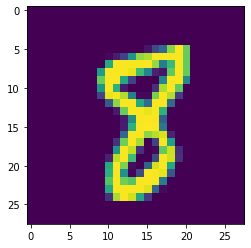

8


In [64]:
import matplotlib.pyplot as plt
predictions = model.predict(x_test)
idx = 5478
plt.imshow(x_test[idx])
plt.show()
print(np.argmax(predictions[idx]))

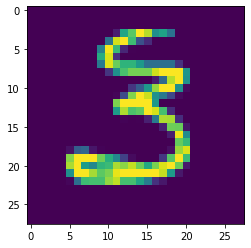

3


In [65]:
predictions = model.predict(x_test)
idx = 5878
plt.imshow(x_test[idx])
plt.show()
print(np.argmax(predictions[idx]))